LIST OF CONTENT Intro to Data Visualization with Python_task_part_2

1. preparations
2. creating visualizations - histogramm - barplot - lineplots - scatterplot
3. saving visualizations
4. saving small sample

# 1. preparations

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
path=r'/Users/ru/Desktop/CF/04 Achievement 4_Python'

In [3]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path,
'02_Data','2.2 Prepared Data', 'ords_prods_cust_merge.pkl'))


In [4]:
ords_prods_cust_merge.shape


(9729959, 34)

# 2. creating visualizations

Text(0.5, 1.0, 'Orders hour of Day')

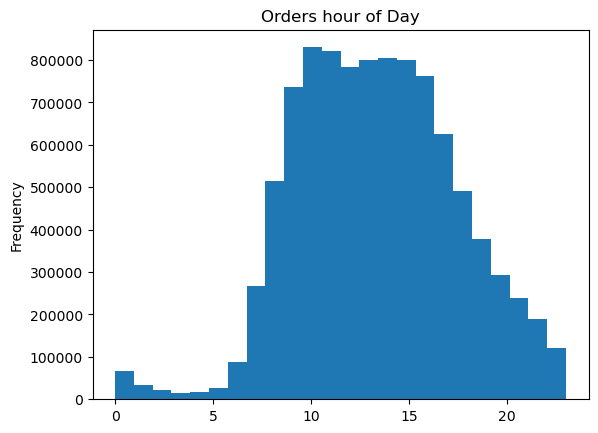

In [5]:
#histogram: frequency of order_hour_of_day
hist_ord_hod=ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins=24)
hist_ord_hod.set_title('Orders hour of Day')


explanation:
The histogram shows the frequency of the orders, according to the hour of the day.
To keep the visualization clear it makes sense to set the bins in the x axis on 24 - according to the hours of the day.
What we see is the highest frequency of orders during the day between 10 am and 4 pm and a very low frequency duriung the night between midnight and 6 am. 
What astonishes me is the highest frequency during the day i.e. during regular working time. I would have asumed that the peaks are rather before and after working hours in the morning and the evening.

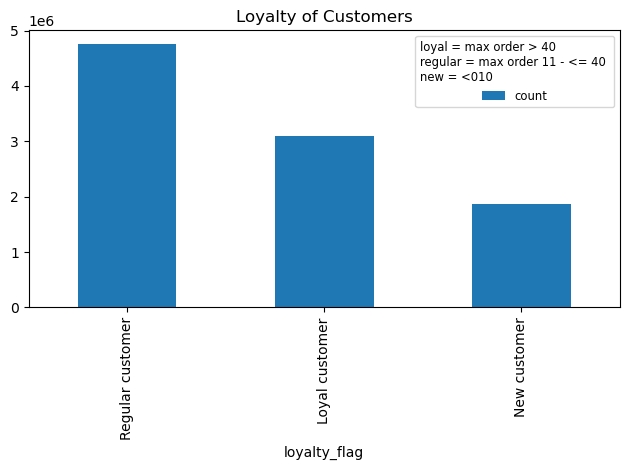

In [27]:
# bar chart of loyalty_flag
bar_loyalty=ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar()
bar_loyalty.set_title('Loyalty of Customers')

bar_loyalty.legend(title='loyal = max order > 40 \nregular = max order 11 - <= 40 \nnew = <010', loc='upper right', fontsize='small', title_fontsize='small')

plt.tight_layout()

In [28]:
# creating a sample in relation 70/30
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [29]:
# assignig the big sample
big = ords_prods_cust_merge[dev]

In [30]:
# assigning the small sample
small=ords_prods_cust_merge[~dev]

In [31]:
#sample check
len(ords_prods_cust_merge)

9729959

In [32]:
len(small)+len(big)

9729959

In [33]:
# assigning small sample for linechart
# linechart on order_hour_of_day and prices
df_2 = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Pricerange over the Day')

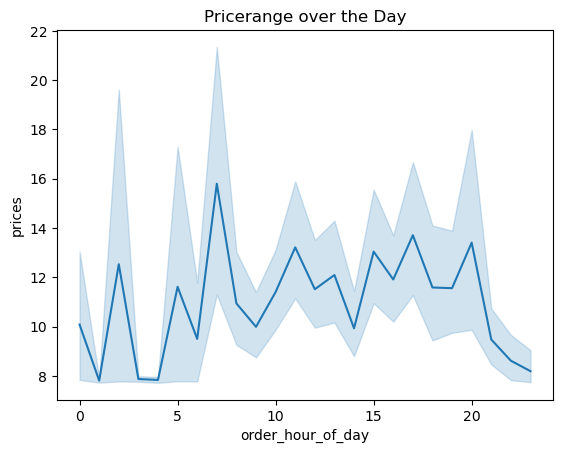

In [34]:
line_ord_hod_prices = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Pricerange over the Day')


In [35]:
ords_prods_cust_merge['prices'].describe()

count    9.720823e+06
mean     1.182518e+01
std      4.831414e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

explanation:
the first view on the linechart suggest big fluctuations, but the second view on the y axis with the prices shows a very small scale. The difference is somewhere between 10 cents. Result: no relevant price differences over the day.
I would not recommend this visualization for a presentation because it is misleading at the first sight.

In [36]:
# assigning small sample for linechart
# linechart  on correlation of age and dependants
df_3 = small[['n_dependants', 'age']]

Text(0.5, 1.0, 'Dependants according to Age')

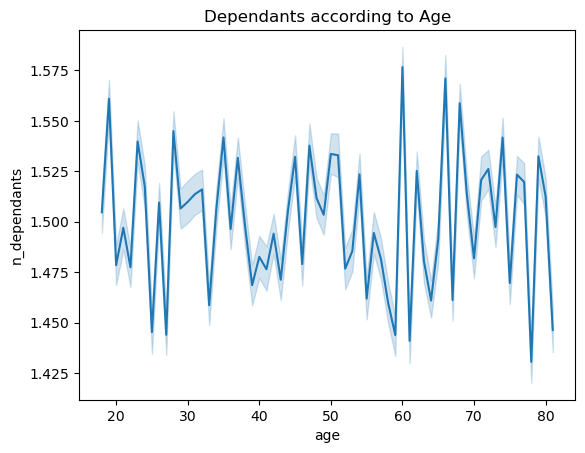

In [37]:
line_age_dep=sns.lineplot(data=df_3, x= 'age', y= 'n_dependants')
plt.title('Dependants according to Age')

explanation:
the linechart reveals that there is no significant correlation between age and dependants of customers

In [38]:
# assigning small sample for scatterplot
# scatterplot on relation of income and age
df_4=small[['age', 'income']]

Text(0.5, 1.0, 'Income and Age')

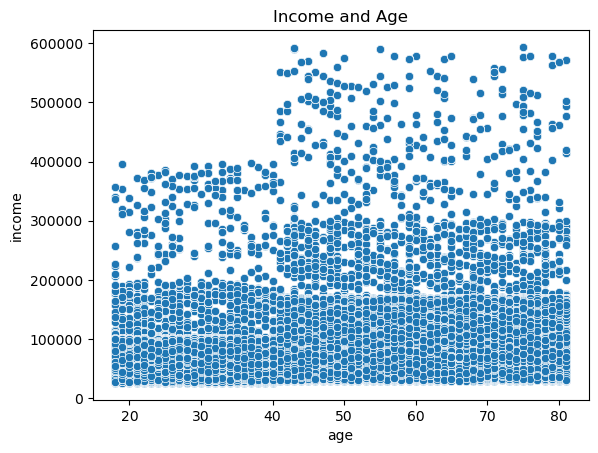

In [39]:
scpl_age_income =sns.scatterplot(data=df_4, x ='age', y='income')
plt.title('Income and Age')

explanation:
there is a relevant step in income around the age of 40, but ther is also a high density of dots in the lower third of the income scale, regardless of age.

# 3. saving visualizations

In [40]:

hist_ord_hod.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'hist_orders_hod.png'))

In [41]:
bar_loyalty.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'bar_loyalty_flag.png'))

In [42]:
line_ord_hod_prices.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'line_orders_hod_prices.png'))

In [43]:
line_age_dep.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'line_age_dependants.png'))

In [44]:
scpl_age_income.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'scpl_age_income.png'))

# 4. saving small sample

In [45]:
small.to_pickle(os.path.join(path, '02_Data','2.2 Prepared Data', 'small_ords_prods_cust_merge.pkl'))